# Networkx 시각화

In [5]:
import networkx as nx 
import matplotlib.pyplot as plt 

In [6]:
g = nx.Graph()

In [3]:
type(g)

networkx.classes.graph.Graph

In [7]:
#노드 추가
g.add_nodes_from([1,2,3,4,5,6])
#edge 추가
g.add_edges_from([(1,3),(2,4),(3,5),(2,6),(3,6)])


In [8]:
print(g.nodes())
print(g.edges())


[1, 2, 3, 4, 5, 6]
[(1, 3), (2, 4), (2, 6), (3, 5), (3, 6)]


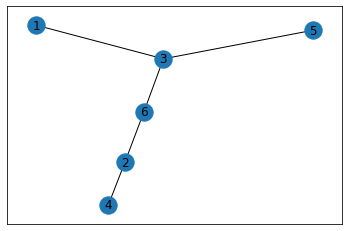

In [9]:
nx.draw_networkx(g)

In [10]:
nx.write_graphml(g,'graph_test.graphml')

In [11]:
g.nodes[1]['gender'] = 'male'
g.nodes[2]['gender'] = 'female'
g.nodes[3]['gender'] = 'male'
g.nodes[4]['gender'] = 'female'
g.nodes[5]['gender'] = 'male'
g.nodes[6]['gender'] = 'male'

print(nx.get_node_attributes(g,'gender'))

{1: 'male', 2: 'female', 3: 'male', 4: 'female', 5: 'male', 6: 'male'}


In [12]:
g[1][3]['weight'] =3 #g.edges[1,3]['weight] =3
g.edges[2,4]['weight'] = 5 
g.edges[2,6]['weight'] = 2 
g.edges[3,5]['weight'] = 7 
g.edges[3,6]['weight'] = 1 

print(nx.get_edge_attributes(g,'weight')) #edge weight 값 얻기

{(1, 3): 3, (2, 4): 5, (2, 6): 2, (3, 5): 7, (3, 6): 1}


In [13]:
g.nodes(data=True)

NodeDataView({1: {'gender': 'male'}, 2: {'gender': 'female'}, 3: {'gender': 'male'}, 4: {'gender': 'female'}, 5: {'gender': 'male'}, 6: {'gender': 'male'}})

In [14]:
g.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [15]:
g.edges(data=True)

EdgeDataView([(1, 3, {'weight': 3}), (2, 4, {'weight': 5}), (2, 6, {'weight': 2}), (3, 5, {'weight': 7}), (3, 6, {'weight': 1})])

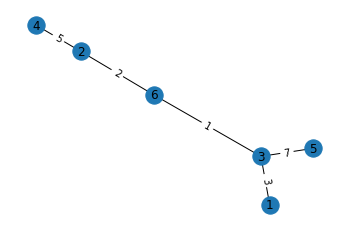

In [16]:
pos = nx.spring_layout(g)
nx.draw_networkx(g,pos) 

labels = nx.get_edge_attributes(g,'weight') #edge label: edge weight 값
nx.draw_networkx_edge_labels(g,pos,edge_labels=labels)

plt.axis('off')
plt.show()

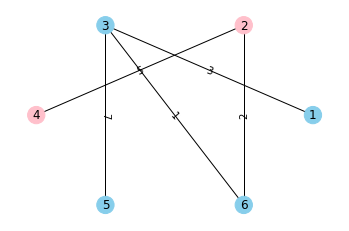

In [17]:
color_map = []
for n,d in g.nodes(data=True):
    if d['gender'] == 'female':
        color_map.append('pink')
    else:
        color_map.append('skyblue')
pos = nx.circular_layout(g)


labels = nx.get_edge_attributes(g,'weight') #edge label: edge weight 값
nx.draw_networkx_edge_labels(g,pos,edge_labels=labels)
nx.draw_networkx(g,pos,node_color = color_map)

plt.axis('off')
plt.show()

In [18]:
female_nodes = [n for n,d in g.nodes(data=True) if d['gender']=='female']  
print(female_nodes)

[2, 4]


# Centrality

Degree Centrality: tie가 얼마나 많은지의 정도
- 특정 node의 neighbor 수 / 최대로 가질 수 있는 neighbor 수 = degree / (n-1)
- 최대로 가질 수 있는 neighbor 수는 n-1. (self-loop 고려X)

In [28]:
nx.degree_centrality(g)

{1: 0.2, 2: 0.4, 3: 0.6000000000000001, 4: 0.2, 5: 0.2, 6: 0.4}

Betweenness Centrality: 얼마나 bridge 역할을 하는지의 정도
- 특정 node를 지나가는 shortest path의 수 / 모든 가능한 shortest path의 수
- 여러 집단을 이어주는 역할을 하는 node를 파악할 때 용이 (ex. 정치 관심 그룹과 예술 관심 그룹을 이어주는 역할을 하는 node 파악)

In [29]:
nx.betweenness_centrality(g)

{1: 0.0, 2: 0.4, 3: 0.7000000000000001, 4: 0.0, 5: 0.0, 6: 0.6000000000000001}

Closeness Centrality: 다른 node들과 얼마나 close하게 연결되어 있나
- 특정 node에서의 다른 node까지의 shortest path를 고려
- (n-1) / 특정 node에서 다른 모든 node까지의 shortest path distance의 합
- n-1은 sum of minimum possible distances. (모든 다른 node까지 1로 가는 게 minimum이니까)
- 분모(특정 node에서 다른 모든 node까지의 shortest path distance의 합)가 작을수록 central한 것이므로, closeness centraliy 값은 높을수록 더 중요도가 높은 것!

In [30]:
nx.closeness_centrality(g)

{1: 0.4166666666666667,
 2: 0.5,
 3: 0.625,
 4: 0.35714285714285715,
 5: 0.4166666666666667,
 6: 0.625}

Eigenvector centrality: 얼마나 central한 node들과 연결되어 있나
- 특정 node의 neighbor들의 centrality를 고려
- ex) 단순히 많은 follower가 있는 사람보다 많은 follower가 있는 사람들에 의해 많이 follow되는 사람을 더 중요한 influencer라고 간주
- Ax = λx → eigenvector x의 n번째 값이 n번째 node의 eigenvector centrality.
- A: adjacency matrix of the graph, λ: eigenvalue, x: eigenvector

In [31]:
nx.eigenvector_centrality(g)

{1: 0.3162254512220179,
 2: 0.37175243743550507,
 3: 0.6014982337968757,
 4: 0.19544325298260648,
 5: 0.3162254512220179,
 6: 0.5116687042046243}

# Subgraphs
큰 그룹에서 일부를 떼어서 그려보기
(특정 node 사이의 path, communties / cliques, degree of seperation 등을 파악하기 용이)

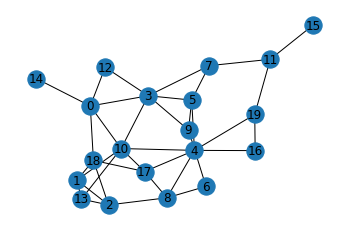

In [44]:
G = nx.erdos_renyi_graph(n=20,p=0.2)
plt.axis('off')
nx.draw_networkx(G)

In [45]:
#node 10 과 연결된 neighbor node 추출
nodes = list(G.neighbors(10))
nodes.append(10)
nodes

[0, 1, 3, 4, 13, 17, 10]

In [46]:
G_ten = G.subgraph(nodes) # subgraph를 구성할 node의 list를 G.subgraph() 함수에 넣어준다
G_ten.edges() # 넣어준 list 속 node들 사이의 edge가 반영됨 

EdgeView([(0, 3), (0, 10), (1, 10), (1, 13), (3, 10), (4, 10), (4, 17), (10, 13), (10, 17)])

(-0.961496360747321,
 1.152610115880965,
 -1.2063308817988145,
 1.1713868989303822)

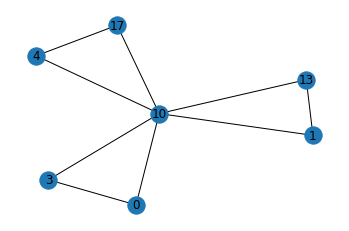

In [48]:
nx.draw_networkx(G_ten)
plt.axis('off')

### 전체 네트워크와 Ego Network

- 전체 네트워크(Whole Network): 네트워크를 구성하고 있는 모든 node와 그 사이의 관계를 모두 포함 (ex. 중세 플로랑스 지역 주요 가문들 간의 혼인 관계 네트워크)
- ego network: 특정 node의 personal network를 의미 (ex. Medici 가문의 ego network: Medici 가문과 연결된 tie만 표현)

# Visualization with nxviz

## 단순 네트워크 시각화

In [53]:
!pip install nxviz


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [55]:
pip install --upgrade pip

     |████████████████████████████████| 2.0 MB 11.1 MB/s            
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
ERROR: Could not install packages due to an OSError: Cannot move the non-empty directory '/opt/anaconda3/lib/python3.9/site-packages/pip-21.3.1.dist-info/': Lacking write permission to '/opt/anaconda3/lib/python3.9/site-packages/pip-21.3.1.dist-info/'.

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import nxviz as nv  #파이썬 3.10.0에서 실행하기


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


TypeError: _AxesBase.draw() missing 1 required positional argument: 'renderer'

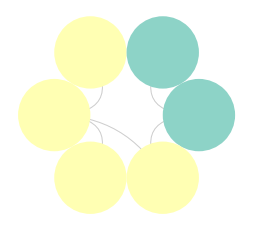

In [32]:
c = nv.circos(g,group_by="gender",sort_by="gender",node_color_by="gender")
c.draw()
plt.show()

## 복잡한 네트워크 시각화

In [34]:
from random import choice

G = nx.erdos_renyi_graph(n=30,p=0.2)

#print(G.nodes(data=True))
for n,d in G.nodes(data=True):
    G.nodes[n]['class'] = choice(['one','two','three']) #3개 클라스중 아무거나 뽑아줌


In [35]:
print(G.nodes(data=True))

[(0, {'class': 'three'}), (1, {'class': 'three'}), (2, {'class': 'one'}), (3, {'class': 'two'}), (4, {'class': 'one'}), (5, {'class': 'two'}), (6, {'class': 'two'}), (7, {'class': 'one'}), (8, {'class': 'two'}), (9, {'class': 'two'}), (10, {'class': 'one'}), (11, {'class': 'three'}), (12, {'class': 'one'}), (13, {'class': 'one'}), (14, {'class': 'one'}), (15, {'class': 'one'}), (16, {'class': 'three'}), (17, {'class': 'one'}), (18, {'class': 'one'}), (19, {'class': 'one'}), (20, {'class': 'one'}), (21, {'class': 'three'}), (22, {'class': 'two'}), (23, {'class': 'three'}), (24, {'class': 'two'}), (25, {'class': 'three'}), (26, {'class': 'one'}), (27, {'class': 'one'}), (28, {'class': 'one'}), (29, {'class': 'three'})]


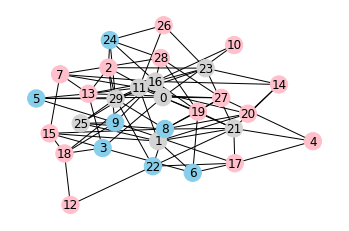

In [38]:
color_map = []
for n,d in G.nodes(data=True): 
    if d['class'] == 'one':
        color_map.append('pink')
    elif d['class'] == 'two':
        color_map.append('skyblue')
    else:
        color_map.append('lightgrey')
nx.draw_networkx(G,node_color= color_map) 
plt.axis('off')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


TypeError: BasePlot.draw() takes 0 positional arguments but 1 was given

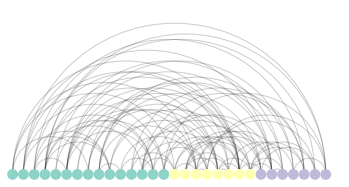

In [39]:
ap = nv.ArcPlot(G, node_color="class", node_order='class')
ap.draw()

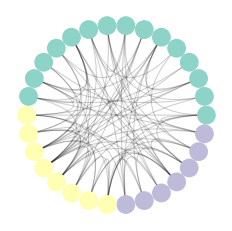

In [43]:
c = nv.circos(G, group_by="class",sort_by="class",node_color_by="class")
#c.draw()
plt.show()